In [ ]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np

In [ ]:
# import tensorflow as tf
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

In [ ]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

## see the loaded dataset

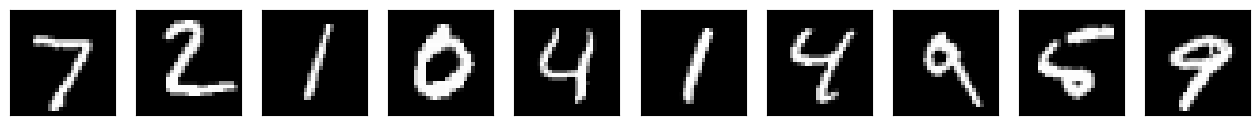

In [ ]:
import matplotlib.pyplot as plt
# Number of digits to display
n=10
# Create a figure to show images
plt.figure(figsize=(16,6))
# Loop throgh the images
for i in range(n):
  # Create a subplot foffr the images
  ax =  plt.subplot(2,n,i+1)
  # Display the original images
  plt.imshow(x_test[i].reshape(28,28))
  # Set the colour map
  plt.gray()
  # hide x_axis and y_axis labels and ticks
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

# Displaying the shapes of dataset

In [ ]:
print("X_train.shape : ",x_train.shape)
print("Y_train.shape : ",y_train.shape)
print("X_test.shape  : ",x_test.shape)
print("Y_test.shape  : ",y_test.shape)

X_train.shape :  (60000, 28, 28)
Y_train.shape :  (60000,)
X_test.shape  :  (10000, 28, 28)
Y_test.shape  :  (10000,)


# Reshapping the data

In [ ]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

# Min Max scalig

In [ ]:
# convereting into floating and normalize the pixel values in 0 and 1
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train /= 255
x_test /= 255

One hot encoding

In [ ]:
from keras.utils import to_categorical
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)
# Seeing the update shapes
print('X_train.shape : ',x_train.shape)
print('Y_train.shape : ',y_train.shape)
print('X_test.shape : ',x_test.shape)
print('Y_test.shape : ',y_test.shape)

X_train.shape :  (60000, 28, 28, 1)
Y_train.shape :  (60000, 10)
X_test.shape :  (10000, 28, 28, 1)
Y_test.shape :  (10000, 10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


In [ ]:
# Define the dimensions of input images
img_rows,img_cols,channels=28,28,1
# Define the number of filters for eaxh layer of CNN
filters=[6,32,80,120] # These are the numbers of in each layer of filter
# Define the number of classes for classification
classes=10

#### Create the model

In [ ]:
model=Sequential()
model.add(Conv2D(filters[0],(3,3),padding='same',activation='relu',input_shape=(img_rows,img_cols,channels)))
model.add(MaxPooling2D(pool_size=(2,2))) # For reducing image size
# for another filter size
model.add(Conv2D(filters[1],(2,2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# for another filter size
model.add(Conv2D(filters[2],(2,2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# for another filter size
model.add(Conv2D(filters[3],(2,2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(classes,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


filter_len*filter_width*input_channels+1 *  Number of  filters

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 80)            │          10,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 80)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 3, 3, 120)           │          38,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 120)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           7,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,094 (226.93 KB)

 Trainable params: 58,094 (226.93 KB)

 Non-trainable params: 0 (0.00 B)

# Fit the model

In [ ]:
model.fit(x_train,y_train,validation_split=0.2,epochs=15,batch_size=64,verbose=1)

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2262 - loss: 2.2671 - val_accuracy: 0.6385 - val_loss: 1.2933
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7165 - loss: 0.8973 - val_accuracy: 0.8969 - val_loss: 0.3271
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9018 - loss: 0.3135 - val_accuracy: 0.9333 - val_loss: 0.2131
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9316 - loss: 0.2164 - val_accuracy: 0.9454 - val_loss: 0.1668
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9466 - loss: 0.1728 - val_accuracy: 0.9478 - val_loss: 0.1633
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9582 - loss: 0.1370 - val_accuracy: 0.9613 - val_loss: 0.1253
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9625 - loss: 0.1190 - val_accuracy: 0.9661 - val_loss: 0.1098
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9681 - loss: 0.1016 - val_accuracy: 0.

# Testing the model

In [ ]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
y_pred_probs=model.predict(x_test,verbose=0)
y_pred=np.where(y_pred_probs > 0.5,1,0)
test_accuracy=accuracy_score(y_test,y_pred)
print("Test accuracy : {}".format(test_accuracy))

Test accuracy : 0.9768


In [ ]:
# Define a mask range for selecting the images
mask = range(20,50)
x_valid=x_test[20:40]
actual_labels=y_test[20:40]

y_pred_probs_valid=model.predict(x_valid)
y_pred_valid=np.where(y_pred_probs_valid > 0.5,1,0)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


# see the images of outpuy

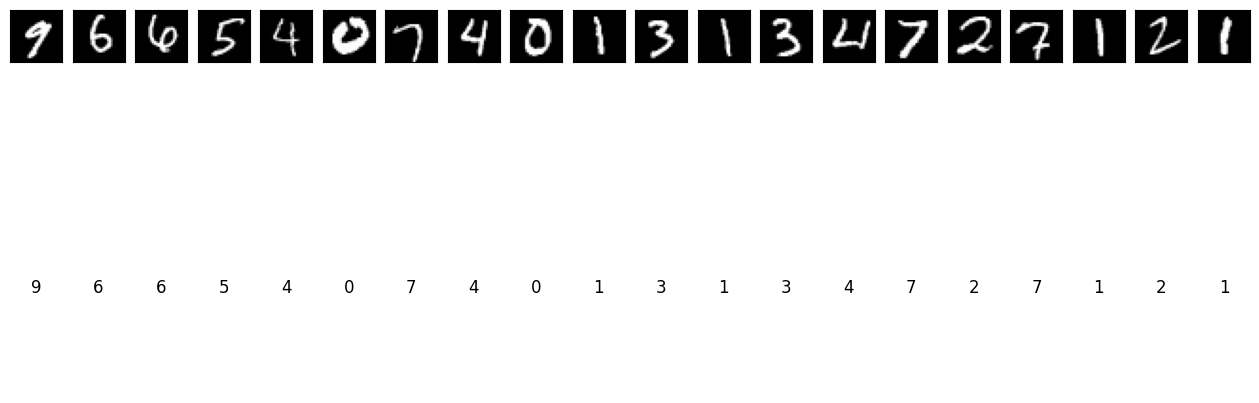

In [ ]:
n=len(x_valid)
plt.figure(figsize=(16,6))

for i in range(n):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_valid[i].reshape(28,28))
  plt.gray()

  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  # Display the predicted images
  predicted_digit=np.argmax(y_pred_probs_valid[i])
  ax = plt.subplot(2,n,i+1+n)
  plt.text(0.5,0.5,str(predicted_digit),fontsize=12, ha='center',va='center')
  plt.axis('off')

plt.show()
plt.close()

# Deep learning on Tweet of Twitte

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dense,SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/Tweets.csv')

In [ ]:
df.shape

(14640, 15)

In [4]:
df = df[df['airline_sentiment_confidence'] >= 0.5]

In [ ]:
df.shape

(14404, 15)

# Check the maximum legth

In [ ]:
## max length count of text
df['text_len'] = df['text'].apply(len)
max_len = df['text_len'].max()

print(max_len)



186


In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,text_len
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),35
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),72
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),71
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),126
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),55


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['airline_sentiment'] = le.fit_transform(df['airline_sentiment'])

class_labels = le.classes_
for i,label in enumerate(class_labels):
    print(f"{i}: {label}")

0: negative
1: neutral
2: positive


In [6]:
x = df['text']
y = df['airline_sentiment']

In [ ]:
print(x.shape)
print(y.shape)

(14404,)
(14404,)


In [7]:
import nltk
import re

In [8]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
# Initialize stopwords, punctuation, and stemmer
stopword_set = set(stopwords.words('english'))
punct = set(".,!?;:")
stemmer = PorterStemmer()

cleaned_data = []
for i in range(len(x)):
    text = re.sub('[^a-zA-Z]', ' ', x.iloc[i])
    words = text.lower().split()
    sen = [stemmer.stem(word) for word in words if word not in stopword_set and word not in punct]
    data = ' '.join(sen)
    cleaned_data.append(data)

In [10]:
lengths = [len(data) for data in cleaned_data]
max_len = max(lengths)
print(max_len)

128


In [11]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(cleaned_data)
sequences = tokenizer.texts_to_sequences(cleaned_data)
max_len = 128
pad_seq = pad_sequences(sequences,maxlen=max_len,padding='pre')



In [ ]:
sequences

[[38, 4569, 136],
 [38, 49, 622, 264, 25, 60, 87, 108],
 [38, 75, 2727, 1894, 3361, 667, 1618, 880, 26, 380, 2086],
 [38, 75, 362, 132, 198],
 [38, 324, 34, 128, 1, 39, 785, 75, 132, 198, 22, 1365],
 [38, 105, 1228, 222, 16, 22, 1173, 2351, 4570, 27, 357],
 [38, 75, 53, 2352, 1288, 2728, 239, 2087, 4571, 10, 9, 4572, 4573],
 [38, 152],
 [38, 243, 130, 11, 256, 76],
 [38, 55, 1895, 415, 1174, 335, 1175, 1366, 1743],
 [38, 555, 538, 3362, 111, 134, 4574, 4575],
 [38, 64, 261, 139, 143, 460, 108, 1432, 26, 67, 786, 208, 108, 167, 556],
 [38, 4576, 22, 1515, 4577, 859, 61, 60, 881, 357, 58, 10, 9, 4578],
 [38, 7],
 [38, 200, 952, 253, 28, 601],
 [38, 787, 93, 589, 649, 1, 165, 489, 445, 162, 64, 198, 724, 910, 4579],
 [38,
  518,
  353,
  200,
  72,
  124,
  1896,
  89,
  39,
  103,
  115,
  1229,
  3363,
  545,
  1059,
  13],
 [22, 38],
 [38, 55, 34, 3364, 206, 265, 408, 32, 65, 22],
 [38, 93, 427, 358, 368, 16, 911, 39, 195, 590],
 [38, 74, 3362, 10, 9, 3365, 4580],
 [38, 74, 4581, 2353,

In [ ]:
print(pad_seq)

[[    0     0     0 ...    38  4569   136]
 [    0     0     0 ...    60    87   108]
 [    0     0     0 ...    26   380  2086]
 ...
 [    0     0     0 ...   337    33 10718]
 [    0     0     0 ...   587    41  1399]
 [    0     0     0 ...    81   107     1]]


In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
num_classes = len(tokenizer.word_index) +1
num_classes

10719

In [ ]:

x = to_categorical(pad_seq,num_classes=num_classes)

In [ ]:
x

array([[[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [1]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

NameError: name 'x' is not defined

# Balancing the dataset

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_resampled,y_resampled = smote.fit_resample(x_train,y_train)

NameError: name 'x_train' is not defined

In [ ]:
dataframe = pd.DataFrame(y_resampled)
dataframe.value_counts()

,count
airline_sentiment,
0,6333
1,6333
2,6333


In [ ]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) +1 ,output_dim=128))
model.add(SimpleRNN(64))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_resampled,y_resampled,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 30s 58ms/step - accuracy: 0.5045 - loss: 0.2865 - val_accuracy: 0.0000e+00 - val_loss: -7.6245
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 41s 58ms/step - accuracy: 0.6247 - loss: -1.5196 - val_accuracy: 0.0000e+00 - val_loss: -10.9672
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.5863 - loss: -1.9001 - val_accuracy: 0.0000e+00 - val_loss: -18.9585
Epoch 4/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 42s 62ms/step - accuracy: 0.6371 - loss: -5.0005 - val_accuracy: 0.0000e+00 - val_loss: -27.9407
Epoch 5/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 39s 57ms/step - accuracy: 0.6609 - loss: -8.5502 - val_accuracy: 0.0000e+00 - val_loss: -47.9389
Epoch 6/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - accuracy: 0.6875 - loss: -12.9512 - val_accuracy: 0.0000e+00 - val_loss: -60.3504
Epoch 7/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - accuracy: 0.6948 - loss: -16.2859 - val_accuracy: 0.0000e+00 - val_loss: -73.1658
Epoch 8/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 4

In [ ]:
loss,accuracy = model.evaluate(x_test,y_test)
print(f'Total loss : {loss:.4f}, Test accuracy : {accuracy:.4f}')

136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5867 - loss: -11.8656
Total loss : -12.7803, Test accuracy : 0.5794
